## Dev env configuration

In [1]:
# install the required python packages
# !pip install numpy scipy pandas yfinance matplotlib mplfinance

## Imports

In [2]:
# import the necessary packages
from datetime import datetime
from scipy import stats
import mplfinance as mpf
import yfinance as yf
import pandas as pd
import numpy as np

## Slope helper method

In [3]:
def calculate_slope(series: pd.Series) -> float:
    # check to see if less than two points were provided
    if len(series) < 2:
        # return NaN since slope cannot be computed
        return np.nan

    # check to see if performing linear regression would cause a division by
    # zero error, including (2) *any* of the data points in the series being
    # NaN, or (2) *all* values in the series being equal
    if series.isna().any() or np.all(series == series.iloc[0]):
        # return NaN
        return np.nan
    
    # compute and return the slope for the input data points
    return stats.linregress(np.arange(0, len(series)), series).slope

## Computing slope of series with Pandas and SciPy

### Positive slope

In [16]:
# define the ticker we are interested in
ticker = "CLS"

# set the start and end date of history requests
end_date = datetime(year=2025, month=1, day=22)
start_date = datetime(year=2024, month=10, day=1)

In [17]:
# download market data
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

In [18]:
# compute the slope of the series
slope = calculate_slope(df[ticker]["Close"])
slope

np.float64(0.7419833146132432)

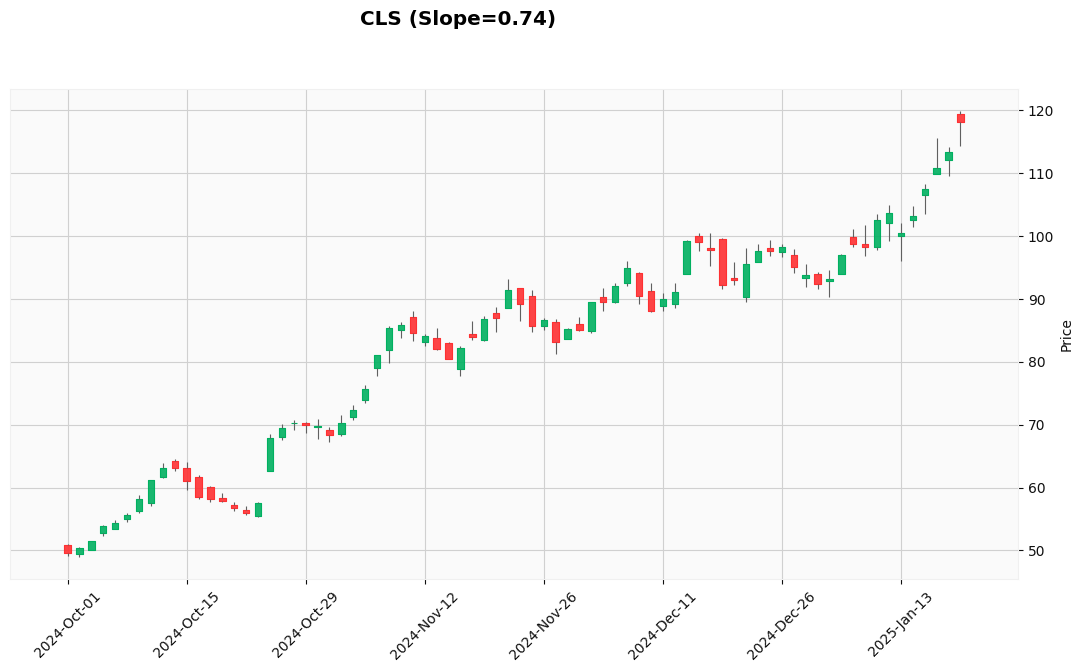

In [19]:
# plot the open, high, low, and close candlestick data
mpf.plot(
    df[ticker],
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    title=f"{ticker} (Slope={slope:0.2f})"
)

### Negative slope

In [4]:
# define the ticker we are interested in
ticker = "NVDA"

# set the start and end date of history requests
end_date = datetime(year=2025, month=3, day=10)
start_date = datetime(year=2025, month=2, day=15)

In [5]:
# download market data
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

In [8]:
# compute the slope of the series
slope = calculate_slope(df[ticker]["Close"])
slope

np.float64(-2.404878654060783)

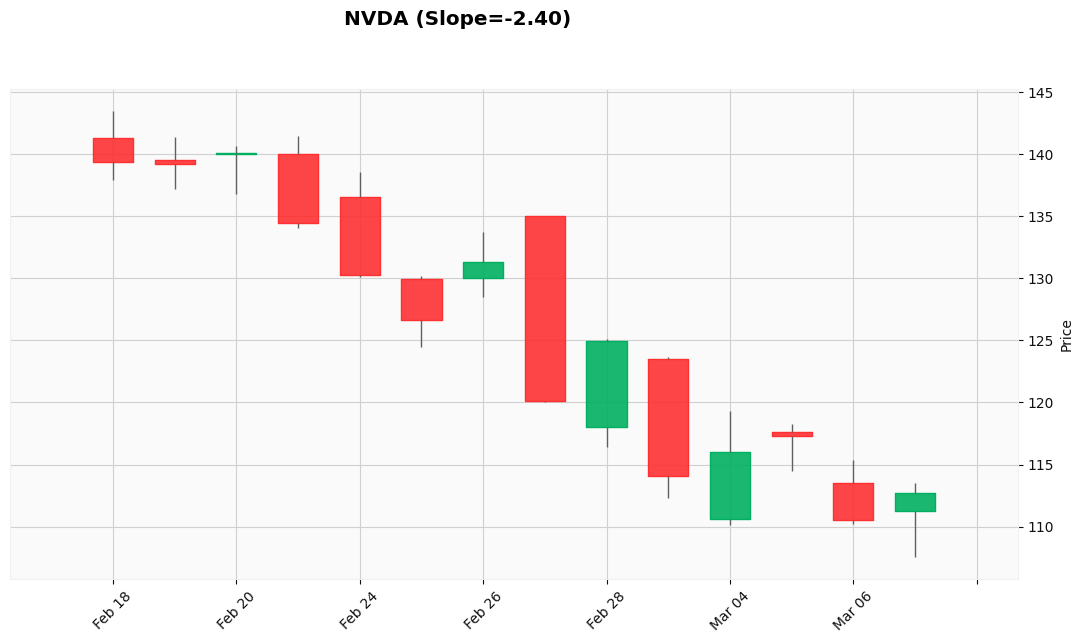

In [11]:
# plot the open, high, low, and close candlestick data
mpf.plot(
    df[ticker],
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    title=f"{ticker} (Slope={slope:0.2f})"
)